In [1]:
print("test")

test


In [2]:
%pip install requests
%pip install zeep
%pip install openml
%pip install seaborn
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [isodate]
   -------------------- ------------------- 1/2 [zeep]
   -------------------- ------------------- 1/2 [zeep]
   -------------------- ------------------- 1/2 [zeep]
   -------------------- ------------------- 1/2 [zeep]
   -------------------- ------------------- 1/2 [zeep]
   -------------------- ------------------- 1/2 [zeep]
   ---------------------------------------- 2/2 [zeep]

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------

  DEPRECATION: Building 'liac-arff' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'liac-arff'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [206]:
import requests
from pprint import pprint
import pandas as pd
from zeep import Client
import logging
import openml
import sqlite3
import xml.etree.ElementTree as ET


# API Number of motor vehicles 

Below you can find the end points. We will use the TypedDataSet end point.
```
{
  "odata.metadata":"https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata","value":[
    {
      "name":"TableInfos","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TableInfos"
    },{
      "name":"UntypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/UntypedDataSet"
    },{
      "name":"TypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
    },{
      "name":"DataProperties","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/DataProperties"
    },{
      "name":"CategoryGroups","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/CategoryGroups"
    },{
      "name":"RegioS","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/RegioS"
    },{
      "name":"Perioden","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/Perioden"
    }
  ]
}
```

In [207]:
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
response= requests.get(url)
users= response.json()
print(users)



{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet', 'value': [{'ID': 0, 'RegioS': 'NL01  ', 'Perioden': '2019JJ00', 'TotaalWegvoertuigen_1': 11372065, 'TotaalMotorvoertuigen_2': 10199679, 'TotaalPersonenautoS_3': 8442982, 'PersonenautoSRelatief_4': 489, 'InBezitNatuurlijkePersonen_5': 7452085, 'InBezitNatuurlijkePersonenRelatief_6': 431, 'TotaalBedrijfsvoertuigen_7': 2283037, 'TotaalBedrijfsmotorvoertuigen_8': 1110651, 'TotaalAanhangwagensEnOpleggers_9': 1172386, 'TotaalBedrijfsmotorvoertuigen_10': 1110651, 'Bestelauto_11': 903005, 'VrachtautoExclTrekkerVoorOplegger_12': 61652, 'TrekkerVoorOplegger_13': 78788, 'SpeciaalVoertuig_14': 57693, 'Bus_15': 9513, 'TotaalAanhangwagensEnOpleggers_16': 1172386, 'Aanhangwagen_17': 1008412, 'Oplegger_18': 163974, 'TotaalMotorfietsen_19': 646046, 'MotorfietsenRelatief_20': 37}, {'ID': 1, 'RegioS': 'NL01  ', 'Perioden': '2020JJ00', 'TotaalWegvoertuigen_1': 11567203, 'TotaalMotorvoertuigen_2': 

##### In order to make the output above more readable print the following cell

In [208]:
#this will print the typed dataset in json format, so name value pairs
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
posts = requests.get(url).json()

pprint (posts)





{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet',
 'value': [{'Aanhangwagen_17': 1008412,
            'Bestelauto_11': 903005,
            'Bus_15': 9513,
            'ID': 0,
            'InBezitNatuurlijkePersonenRelatief_6': 431,
            'InBezitNatuurlijkePersonen_5': 7452085,
            'MotorfietsenRelatief_20': 37,
            'Oplegger_18': 163974,
            'Perioden': '2019JJ00',
            'PersonenautoSRelatief_4': 489,
            'RegioS': 'NL01  ',
            'SpeciaalVoertuig_14': 57693,
            'TotaalAanhangwagensEnOpleggers_16': 1172386,
            'TotaalAanhangwagensEnOpleggers_9': 1172386,
            'TotaalBedrijfsmotorvoertuigen_10': 1110651,
            'TotaalBedrijfsmotorvoertuigen_8': 1110651,
            'TotaalBedrijfsvoertuigen_7': 2283037,
            'TotaalMotorfietsen_19': 646046,
            'TotaalMotorvoertuigen_2': 10199679,
            'TotaalPersonenautoS_3': 8442982,
   

In [209]:
# select columns by first selecting the "value" key from json format
# then specify the specific columns
dfposts = pd.DataFrame(posts["value"])[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'ID',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'Perioden',
            'PersonenautoSRelatief_4',
            'RegioS',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]
dfposts.head()



,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
0,1008412,903005,9513,0,431,7452085,37,163974,2019JJ00,489,...,1172386,1110651,1110651,2283037,646046,10199679,8442982,11372065,78788,61652
1,1023980,927251,9699,1,434,7548770,38,168502,2020JJ00,493,...,1192482,1135943,1135943,2328425,654387,10374721,8584391,11567203,80118,61746
2,1029636,945433,9050,2,440,7683236,38,170014,2021JJ00,497,...,1199650,1151740,1151740,2351390,666597,10504756,8686419,11704406,79932,60831
3,1051486,974792,8532,3,444,7803950,39,177294,2022JJ00,502,...,1228780,1182857,1182857,2411637,677787,10688353,8827709,11917133,82436,60867
4,1069827,989841,8756,4,440,7842473,39,185262,2023JJ00,501,...,1255089,1201061,1201061,2456150,690724,10808892,8917107,12063981,85679,60811


In [210]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Aanhangwagen_17                       119 non-null    int64 
 1   Bestelauto_11                         119 non-null    int64 
 2   Bus_15                                119 non-null    int64 
 3   ID                                    119 non-null    int64 
 4   InBezitNatuurlijkePersonenRelatief_6  119 non-null    int64 
 5   InBezitNatuurlijkePersonen_5          119 non-null    int64 
 6   MotorfietsenRelatief_20               119 non-null    int64 
 7   Oplegger_18                           119 non-null    int64 
 8   Perioden                              119 non-null    object
 9   PersonenautoSRelatief_4               119 non-null    int64 
 10  RegioS                                119 non-null    object
 11  SpeciaalVoertuig_14             

In [211]:
dfposts.describe(include="all")

,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
count,1.190000e+02,1.190000e+02,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.00000,119,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,119.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019JJ00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.854826e+05,1.713652e+05,1599.781513,59.000000,458.327731,1.371150e+06,41.445378,31314.02521,NaN,531.352941,...,2.167967e+05,2.084077e+05,2.084077e+05,4.252043e+05,119986.058824,1.885717e+06,1.557323e+06,2.102513e+06,14653.285714,10856.092437
std,2.359257e+05,2.222785e+05,2209.500400,34.496377,43.597953,1.791485e+06,6.256790,41848.47121,NaN,92.283424,...,2.769861e+05,2.701247e+05,2.701247e+05,5.464519e+05,155689.531752,2.460088e+06,2.034669e+06,2.735181e+06,19137.159198,14132.059518
min,2.181000e+04,2.361800e+04,51.000000,0.000000,375.000000,1.728080e+05,30.000000,2359.00000,NaN,421.000000,...,2.416900e+04,2.922200e+04,2.922200e+04,6.392300e+04,15091.000000,2.477690e+05,2.013010e+05,2.824700e+05,1414.000000,1156.000000
25%,6.106750e+04,4.746650e+04,367.000000,29.500000,422.500000,3.145290e+05,36.000000,4977.00000,NaN,494.500000,...,6.587250e+04,5.816600e+04,5.816600e+04,1.226150e+05,30465.500000,4.397930e+05,3.646235e+05,4.965140e+05,3261.000000,2796.000000
50%,1.131420e+05,1.111590e+05,901.000000,59.000000,469.000000,8.491200e+05,41.000000,16419.00000,NaN,525.000000,...,1.295610e+05,1.382770e+05,1.382770e+05,2.881580e+05,83721.000000,1.132392e+06,9.093020e+05,1.306028e+06,7841.000000,6062.000000
75%,1.834855e+05,1.717850e+05,1628.000000,88.500000,492.500000,1.504870e+06,45.500000,39000.00000,NaN,545.500000,...,2.208010e+05,2.096705e+05,2.096705e+05,4.280710e+05,121018.500000,1.981126e+06,1.656020e+06,2.177265e+06,17043.000000,12079.500000


In [212]:
dfposts.isnull().sum()

Aanhangwagen_17                         0
Bestelauto_11                           0
Bus_15                                  0
ID                                      0
InBezitNatuurlijkePersonenRelatief_6    0
InBezitNatuurlijkePersonen_5            0
MotorfietsenRelatief_20                 0
Oplegger_18                             0
Perioden                                0
PersonenautoSRelatief_4                 0
RegioS                                  0
SpeciaalVoertuig_14                     0
TotaalAanhangwagensEnOpleggers_16       0
TotaalAanhangwagensEnOpleggers_9        0
TotaalBedrijfsmotorvoertuigen_10        0
TotaalBedrijfsmotorvoertuigen_8         0
TotaalBedrijfsvoertuigen_7              0
TotaalMotorfietsen_19                   0
TotaalMotorvoertuigen_2                 0
TotaalPersonenautoS_3                   0
TotaalWegvoertuigen_1                   0
TrekkerVoorOplegger_13                  0
VrachtautoExclTrekkerVoorOplegger_12    0
dtype: int64

#### Since we want to use this data to portray the impact of cars in specific regions on the air quality, we choose to use the following attributes from this data source:
```
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

```

In [213]:
print(dfposts["RegioS"].nunique(), "different regions")
print(dfposts["RegioS"].unique())
print(dfposts["RegioS"].value_counts())

17 different regions
['NL01  ' 'LD01  ' 'LD02  ' 'LD03  ' 'LD04  ' 'PV20  ' 'PV21  ' 'PV22  '
 'PV23  ' 'PV24  ' 'PV25  ' 'PV26  ' 'PV27  ' 'PV28  ' 'PV29  ' 'PV30  '
 'PV31  ']
RegioS
NL01      7
LD01      7
LD02      7
LD03      7
LD04      7
PV20      7
PV21      7
PV22      7
PV23      7
PV24      7
PV25      7
PV26      7
PV27      7
PV28      7
PV29      7
PV30      7
PV31      7
Name: count, dtype: int64


There are 17 different regios, divided in the following two categories: LD (landsdeel) and PV (provincies). We choose to primiraly focus on provinces due to data granularity. 

In [214]:
dfprovince = dfposts[dfposts["RegioS"].str.startswith("PV")]
print(dfprovince)

     Aanhangwagen_17  Bestelauto_11  Bus_15   ID  \
35             44354          31359      99   35   
36             45012          32179     291   36   
37             45677          33225     343   37   
38             46662          34112     346   38   
39             47653          34680     372   39   
..               ...            ...     ...  ...   
114            70317          52209     351  114   
115            72178          53705     332  115   
116            74049          54396     361  116   
117            74725          55128     362  117   
118            75962          56734     352  118   

     InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
35                                    431                        251789   
36                                    436                        255316   
37                                    444                        260707   
38                                    450                        265561   


https://standaarden.overheid.nl/tooi/waardelijsten/expression?lijst_uri=https%3A%2F%2Fidentifier.overheid.nl%2Ftooi%2Fset%2Frwc_provincies_compleet%2F1

This website was used to create the encoded values

In [215]:
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

pvencoding = {'PV20':'Groningen',
              'PV21':'Friesland',
              'PV22':'Drenthe',
              'PV23':'Overijssel',  
              'PV24':'Flevoland',
              'PV25':'Gelderland',
              'PV26':'Utrecht',
              'PV27':'Noord-Holland',
              'PV28':'Zuid-Holland',
              'PV29':'Zeeland',
              'PV30':'Noord-Brabant',
              'PV31':'Limburg'}


dfprovince = dfprovince.groupby('RegioS')[columns_vehicledb].sum().reset_index()
dfprovince["Sum"] = dfprovince[columns_vehicledb].sum(axis=1)
dfprovince['RegioS'] = dfprovince['RegioS'].astype(str).str.strip()
dfprovince['RegioS'] = dfprovince['RegioS'].map(pvencoding)
print(dfprovince[["RegioS","Sum"]])


           RegioS       Sum
0       Groningen  11936457
1       Friesland  14990976
2         Drenthe  11755668
3      Overijssel  25136738
4       Flevoland  12550586
5      Gelderland  43979534
6         Utrecht  27202822
7   Noord-Holland  47438165
8    Zuid-Holland  62190626
9         Zeeland   8732228
10  Noord-Brabant  57201144
11        Limburg  23560147


#### Check if this also contains the LD values

In [216]:
dftotal = dfprovince.groupby('RegioS')[columns_vehicledb].sum().sum()

dftotal["Sum"] = dftotal[columns_vehicledb].sum()

print(dftotal)

Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoertuigen_8           8266837
TotaalBedrijfsvoertuigen_7               16866438
TotaalMotorfietsen_19                     4759447
TotaalMotorvoertuigen_2                  74800095
TotaalPersonenautoS_3                    61773811
TotaalWegvoertuigen_1                    83399696
TrekkerVoorOplegger_13                     581247
VrachtautoExclTrekkerVoorOplegger_12       430625


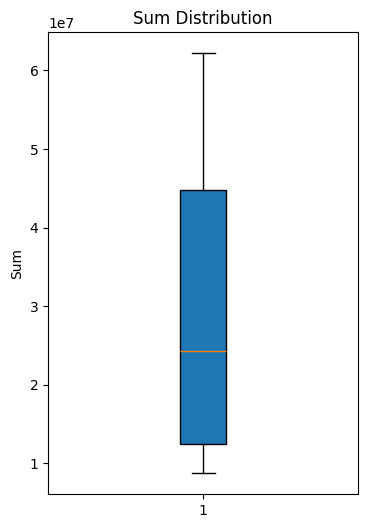

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
sum = dfprovince['Sum'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(sum, vert=True, patch_artist=True)
plt.title("Sum Distribution")
plt.ylabel("Sum")
plt.show()

Made this visualization code with Farheen.

In [218]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: c:\Users\Ratiba Zaid\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [219]:
import plotly.express as px


bar = px.bar(dfprovince, x='RegioS', y= 'Sum', title='Bar chart of sum of cars per region')
bar.update_layout(yaxis_title='Sum of cars', xaxis_title= "Region Code", barmode='group') 

bar.show()

##### Standardize numerical data below, so that this data could be used for the predictive part (machine learning algorithms, such as SVM, dbscan, etc.)

https://www.datacamp.com/tutorial/normalization-vs-standardization


In [220]:
from sklearn.preprocessing import StandardScaler

standardization = dfprovince[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]


standardize = StandardScaler().fit_transform(standardization)

dfstandardization = pd.DataFrame(standardize, columns=standardization.columns)
print(dfstandardization)

    Aanhangwagen_17  Bestelauto_11    Bus_15  \
0         -0.826098      -0.964925 -0.580957   
1         -0.491041      -0.676733  0.872484   
2         -0.723266      -1.008951 -0.931738   
3          0.210462      -0.215500  0.309090   
4         -1.310117      -0.711399 -1.004122   
5          1.461661       0.782840 -0.493932   
6         -0.431911       0.090297  0.308059   
7          0.523144       1.021050  2.670520   
8          1.177683       1.695970  0.593468   
9         -1.131960      -1.141830 -0.797901   
10         1.852307       1.695805 -0.364220   
11        -0.310864      -0.566621 -0.580751   

    InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
0                              -0.305425                     -0.884965   
1                               0.691308                     -0.751204   
2                               1.356838                     -0.893761   
3                               0.153884                     -0.228767   
4    

#### IMPORTANT: CHOOSE SAMPLING DURING THE PREDICTIVE PART. IT IS NOW NOT POSSIBLE TO CHOOSE THIS, BECAUSE THE SAMPLES NEEDS TO BE ALIGNED WITH PM2.5 PM10 AND NO2 DATA.

# API Luchtmeetnet NO2

In this part of the code, we will retrieve data from the luchtmeetnet api. We filter through the measurements using ?formula=NO2 , ?formula=PM10 and ?formula=PM25  

In [221]:
url_province = "https://api.luchtmeetnet.nl/open_api/stations"
posts_luchtmeetnet_province = requests.get(url_province).json()
pprint(posts_luchtmeetnet_province)


{'data': [{'location': 'Overschie-A13', 'number': 'NL01491'},
          {'location': 'Rotterdam-Maasvlakte', 'number': 'NL01497'},
          {'location': 'Rotterdam-HvHolland', 'number': 'NL01496'},
          {'location': 'Wijk aan Zee-Bosweg', 'number': 'NL49557'},
          {'location': 'Nistelrode-Gagelstraat', 'number': 'NL10248'},
          {'location': 'Ridderkerk-Voorweg', 'number': 'NL01912'},
          {'location': 'Meerssen- Beekerweg', 'number': 'NL50013'},
          {'location': 'Eijsden-Trichterweg', 'number': 'NL50012'},
          {'location': 'Rotterdam-Hoogvliet', 'number': 'NL01485'},
          {'location': 'Ridderkerk-A16', 'number': 'NL01489'},
          {'location': 'Zaandam-Wagenschotpad', 'number': 'NL49701'},
          {'location': 'Burgh-Haamstede', 'number': 'NL10320'},
          {'location': 'Zevenbergen-Galgenweg', 'number': 'NL53016'},
          {'location': 'Den Haag-Rebecquestraat', 'number': 'NL10404'},
          {'location': 'Den Haag-Amsterdamse Veerkad

In [222]:
dfposts_NO2_province = pd.DataFrame(posts_luchtmeetnet_province["data"])[['location','number']]
dfposts_NO2_province.head(10)

,location,number
0,Overschie-A13,NL01491
1,Rotterdam-Maasvlakte,NL01497
2,Rotterdam-HvHolland,NL01496
3,Wijk aan Zee-Bosweg,NL49557
4,Nistelrode-Gagelstraat,NL10248
5,Ridderkerk-Voorweg,NL01912
6,Meerssen- Beekerweg,NL50013
7,Eijsden-Trichterweg,NL50012
8,Rotterdam-Hoogvliet,NL01485
9,Ridderkerk-A16,NL01489


In [223]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=NO2" # get data from luchtmeetnet api and filter it so that only NO2 formulas will be retrieved
posts_luchtmeetnet_NO2 = requests.get(url).json()
#pprint(posts_luchtmeetnet_NO2)



In [224]:
dfposts_NO2 = pd.DataFrame(posts_luchtmeetnet_NO2["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_NO2.head(10))



  formula station_number         timestamp_measured  value
0     NO2        NL10404  2025-10-09T19:00:00+00:00   5.38
1     NO2        NL49021  2025-10-09T19:00:00+00:00  10.90
2     NO2        NL49565  2025-10-09T19:00:00+00:00   8.20
3     NO2        NL10247  2025-10-09T19:00:00+00:00  15.02
4     NO2        NL10641  2025-10-09T19:00:00+00:00  19.43
5     NO2        NL49703  2025-10-09T19:00:00+00:00   3.40
6     NO2        NL49014  2025-10-09T19:00:00+00:00   9.10
7     NO2        NL10644  2025-10-09T19:00:00+00:00   7.79
8     NO2        NL49704  2025-10-09T19:00:00+00:00  10.80
9     NO2        NL49020  2025-10-09T19:00:00+00:00  14.40


In [225]:
meanlocation = dfposts_NO2.groupby('station_number')['value'].mean().reset_index()

print(meanlocation)

   station_number      value
0         NL01485  23.876923
1         NL01487  52.876923
2         NL01488  30.915385
3         NL01489  36.355556
4         NL01491  24.462500
..            ...        ...
76        NL49704  20.884615
77        NL50002  14.416667
78        NL50003  16.272727
79        NL50010  20.000000
80        NL54004  29.336154

[81 rows x 2 columns]


In [226]:
bar = px.bar(meanlocation, x='station_number' , y= 'value', title='Average µg/m³ NO2 per station')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

In [264]:
NO2_pvencoding={'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL10107': 'Groningen',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49021': 'Noord-Holland',
                  'NL10938': 'Zuid-Holland',
                  'NL49019': 'Noord-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10301': 'Groningen',
                  'NL10937': 'Groningen',
                  'NL49002': 'Noord-Holland',
                  'NL50010': 'Limburg',
                  'NL50002': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL49022': 'Noord-Holland'}

dfposts_NO2['RegioS']  = dfposts_NO2['station_number'].map(NO2_pvencoding)
meanprovince = dfposts_NO2.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince)


           RegioS      value
0         Drenthe   3.190000
1       Flevoland  11.445000
2       Friesland   2.911200
3      Gelderland  17.570577
4       Groningen  12.176275
5         Limburg  14.673333
6   Noord-Brabant  12.467614
7   Noord-Holland  17.915290
8      Overijssel   5.298800
9         Utrecht  15.389839
10        Zeeland  12.993684
11   Zuid-Holland  22.099336


In [265]:
len(NO2_pvencoding)

80

In [260]:
print(meanprovince)

           RegioS      value
0         Drenthe   3.190000
1       Flevoland  11.445000
2       Friesland   2.911200
3      Gelderland  17.570577
4       Groningen  12.176275
5         Limburg  14.673333
6   Noord-Brabant  12.467614
7   Noord-Holland  17.915290
8      Overijssel   5.298800
9         Utrecht  15.389839
10        Zeeland  12.993684
11   Zuid-Holland  22.099336


In [261]:
dfposts_NO2['RegioS']
mean_pv = dfposts_NO2.groupby('RegioS')['value'].mean().reset_index()
print(mean_pv)


           RegioS      value
0         Drenthe   3.190000
1       Flevoland  11.445000
2       Friesland   2.911200
3      Gelderland  17.570577
4       Groningen  12.176275
5         Limburg  14.673333
6   Noord-Brabant  12.467614
7   Noord-Holland  17.915290
8      Overijssel   5.298800
9         Utrecht  15.389839
10        Zeeland  12.993684
11   Zuid-Holland  22.099336


### Note for visualization team: add legend for the red line which represent the threshold.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


bar = px.bar(meanlocation, x=NO2_pvencoding, y= 'value', title='total µg/m³ NO2 per region')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

ValueError: All arguments should have the same length. The length of column argument `df[y]` is 81, whereas the length of previously-processed arguments ['x'] is 80

In [231]:
print(NO2_pvencoding)
print(dfposts_NO2['RegioS'])
dfposts_NO2.info()

{'NL49703': 'Noord-Holland', 'NL49553': 'Noord-Holland', 'NL01493': 'Zuid-Holland', 'NL10404': 'Zuid-Holland', 'NL10318': 'Zeeland', 'NL01912': 'Zeeland', 'NL10742': 'Groningen', 'NL10538': 'Noord-Holland', 'NL01496': 'Zuid-Holland', 'NL01495': 'Zuid-Holland', 'NL49007': 'Noord-Holland', 'NL10636': 'Utrecht', 'NL49564': 'Noord-Holland', 'NL10818': 'Overijssel', 'NL10550': 'Noord-Holland', 'NL49546': 'Noord-Holland', 'NL10136': 'Limburg', 'NL10235': 'Noord-Brabant', 'NL01913': 'Zeeland', 'NL10918': 'Friesland', 'NL01487': 'Zuid-Holland', 'NL10639': 'Utrecht', 'NL01497': 'Zeeland', 'NL10644': 'Utrecht', 'NL10633': 'Utrecht', 'NL10741': 'Gelderland', 'NL10437': 'Zeeland', 'NL10247': 'Noord-Brabant', 'NL10445': 'Zeeland', 'NL10934': 'Friesland', 'NL01494': 'Zuid-Holland', 'NL10449': 'Zuid-Holland', 'NL49017': 'Noord-Holland', 'NL49551': 'Noord-Holland', 'NL10617': 'Flevoland', 'NL10442': 'Zuid-Holland', 'NL10446': 'Zuid-Holland', 'NL49565': 'Noord-Holland', 'NL10418': 'Zuid-Holland', 'NL10

In [232]:
print(meanprovince)
print('Mean NO2 value:', meanprovince['value'].mean())

           RegioS      value
0         Drenthe   3.190000
1       Flevoland  11.445000
2       Friesland   2.911200
3      Gelderland  17.570577
4       Groningen  12.176275
5         Limburg  14.673333
6   Noord-Brabant  12.467614
7   Noord-Holland  18.097424
8      Overijssel   5.298800
9         Utrecht  15.389839
10        Zeeland  12.993684
11   Zuid-Holland  22.099336
Mean NO2 value: 12.359423504841397


In [233]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_mean = meanprovince[meanprovince['RegioS'].isin(pv)]
bar = px.bar(meanprovince, x='RegioS' , y= dfposts_NO2.groupby('RegioS')['value'].mean(), title='Average µg/m³ NO2 per Region')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

In [234]:
dfposts_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
 4   RegioS              976 non-null    object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [235]:
print(dfposts_NO2["station_number"].isna().sum())
print(dfposts_NO2["station_number"].nunique(), "station points")
print(dfposts_NO2["station_number"].unique())
print(dfposts_NO2["station_number"].value_counts())

0
81 station points
['NL10404' 'NL49021' 'NL49565' 'NL10247' 'NL10641' 'NL49703' 'NL49014'
 'NL10644' 'NL49704' 'NL49020' 'NL10442' 'NL50003' 'NL49546' 'NL10450'
 'NL49551' 'NL49002' 'NL49019' 'NL01497' 'NL01912' 'NL10444' 'NL49012'
 'NL10643' 'NL10807' 'NL50010' 'NL10318' 'NL49680' 'NL49561' 'NL10617'
 'NL10929' 'NL10742' 'NL01493' 'NL10236' 'NL10230' 'NL49007' 'NL49022'
 'NL10938' 'NL10133' 'NL50002' 'NL10437' 'NL10741' 'NL49553' 'NL10934'
 'NL01491' 'NL54004' 'NL10240' 'NL10636' 'NL10107' 'NL01496' 'NL49003'
 'NL10131' 'NL49701' 'NL10445' 'NL49017' 'NL10248' 'NL10449' 'NL10301'
 'NL10538' 'NL10639' 'NL01488' 'NL01913' 'NL01489' 'NL10136' 'NL10138'
 'NL10235' 'NL10446' 'NL10738' 'NL49564' 'NL01485' 'NL01487' 'NL10550'
 'NL10633' 'NL10418' 'NL01494' 'NL10237' 'NL10918' 'NL10722' 'NL10241'
 'NL10937' 'NL10246' 'NL10818' 'NL01495']
station_number
NL49021    13
NL49020    13
NL49565    13
NL10247    13
NL10641    13
           ..
NL01493     9
NL01489     9
NL49701     9
NL01491     8
NL

In [236]:
dfposts_NO2.describe(include="all")

,formula,station_number,timestamp_measured,value,RegioS
count,1000,1000,1000,1000.000000,976
unique,1,81,13,NaN,12
top,NO2,NL49021,2025-10-09T19:00:00+00:00,NaN,Noord-Holland
freq,1000,13,81,NaN,264
mean,NaN,NaN,NaN,16.223000,NaN
std,NaN,NaN,NaN,13.338752,NaN
min,NaN,NaN,NaN,1.260000,NaN
25%,NaN,NaN,NaN,6.687500,NaN
50%,NaN,NaN,NaN,12.120000,NaN
75%,NaN,NaN,NaN,21.217500,NaN


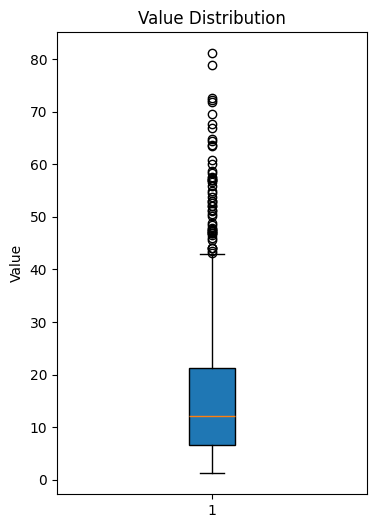

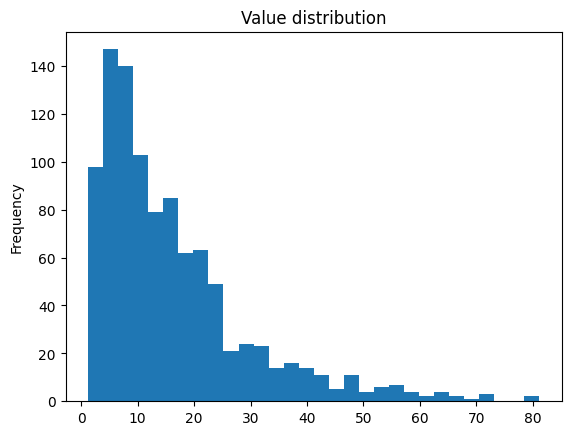

In [237]:
plt.figure(figsize=(4,6))
values = dfposts_NO2['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

dfposts_NO2['value'].plot(kind='hist', bins=30, title='Value distribution')
plt.show()



In [238]:
!pip install seaborn

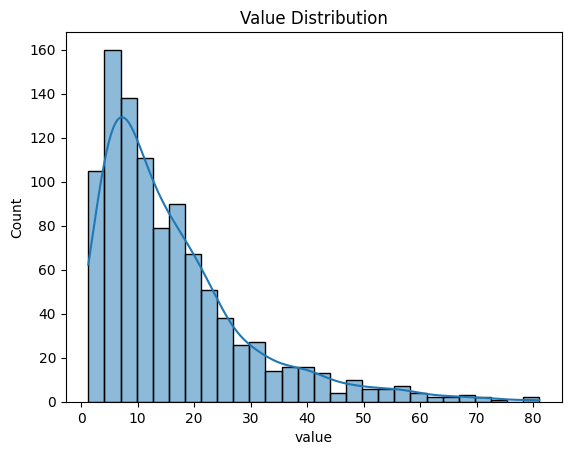

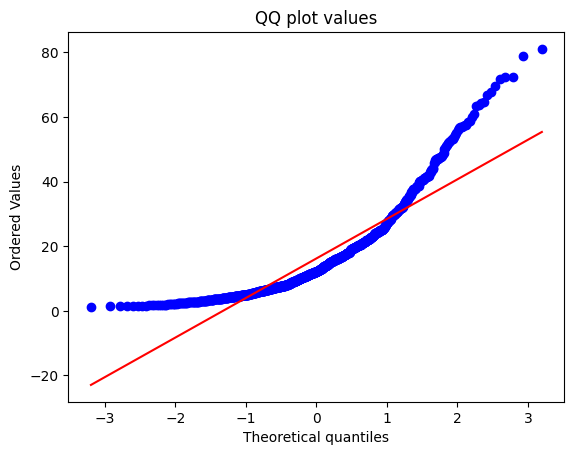

In [239]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [240]:
print(values.skew())


1.6897480021212317


In [241]:
c = abs(values.min())

In [242]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shift = values + c + 0.001
log_x = np.log(shift)  
print(log_x)



0      1.893263
1      2.498234
2      2.247178
3      2.789999
4      3.029699
         ...   
995    3.961974
996    2.842639
997    3.812446
998    2.896519
999    3.581322
Name: value, Length: 1000, dtype: float64


In [243]:
log_x.skew()

np.float64(0.058509271453426305)

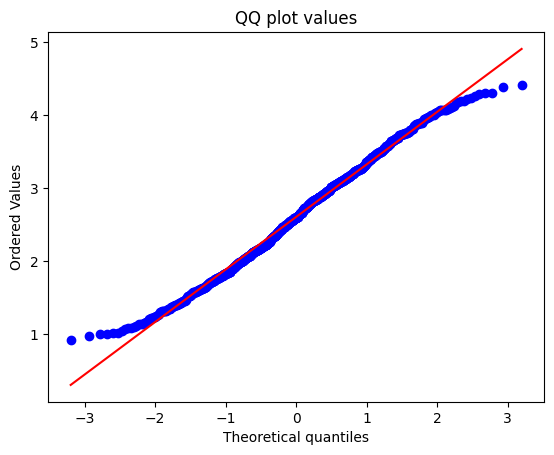

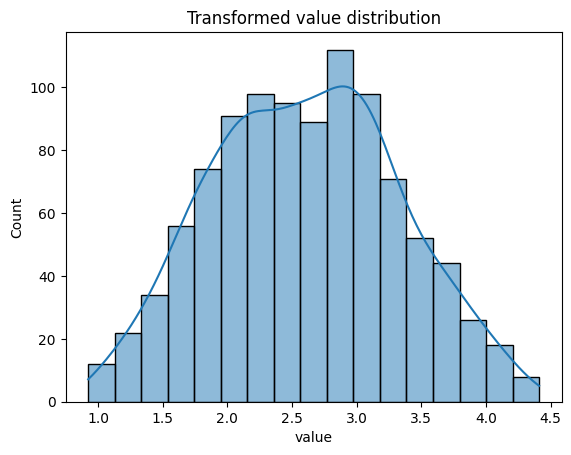

In [244]:
stats.probplot(log_x, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_x,kde=True)
plt.title("Transformed value distribution")
plt.show()


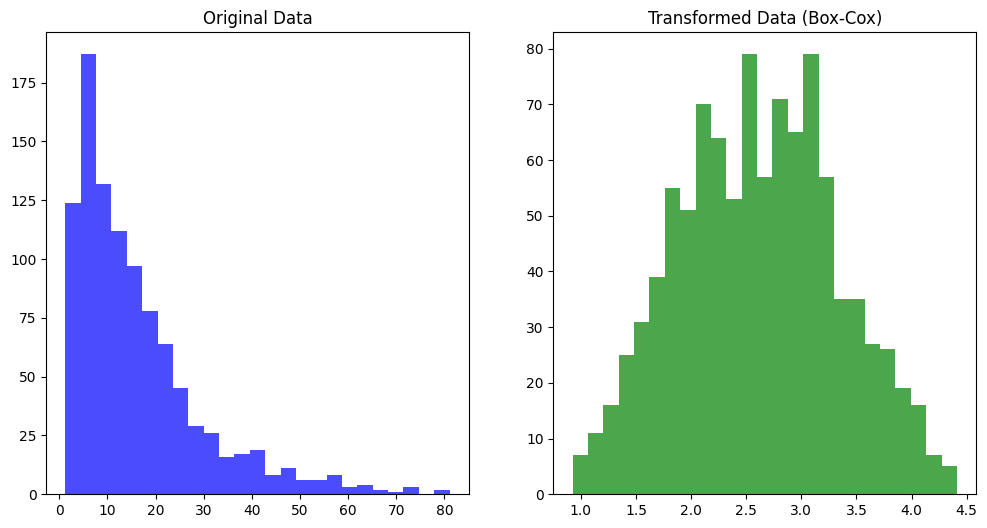

In [245]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(values, bins=25, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(log_x, bins=25, color='green', alpha=0.7)
plt.title('Transformed Data (Box-Cox)')

plt.show()

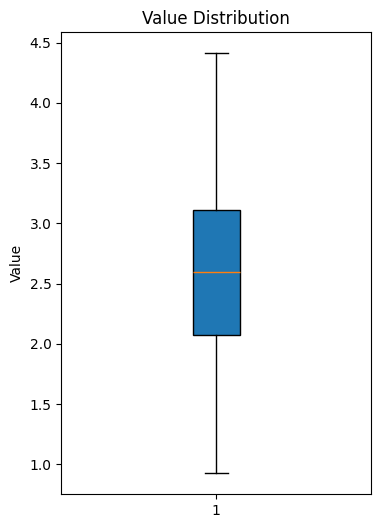

In [246]:
plt.figure(figsize=(4,6))
plt.boxplot(log_x, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

For the predicition part, we need to use the log_x data. 

In [247]:
print(meanprovince)
print(dftotal)

print(meanprovince['value'].mean())


           RegioS      value
0         Drenthe   3.190000
1       Flevoland  11.445000
2       Friesland   2.911200
3      Gelderland  17.570577
4       Groningen  12.176275
5         Limburg  14.673333
6   Noord-Brabant  12.467614
7   Noord-Holland  18.097424
8      Overijssel   5.298800
9         Utrecht  15.389839
10        Zeeland  12.993684
11   Zuid-Holland  22.099336
Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoer

# NOTE: USE PREPROCESSED DATA INSTEAD OF USING THE DATA DIRECTLY from the apis

In [ ]:

dfcorrelation = pd.merge(meanprovince, dfprovince, on='RegioS')

correlation = dfcorrelation[['value', 'Sum']].corr()
corr_matrix = go.Figure(data=go.Heatmap(
        z=correlation.values,
        x=correlation.columns,
        y=correlation.index,
        text=correlation.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix.show()

# API Luchtmeetnet PM2.5

In [ ]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM25" # get data from luchtmeetnet api and filter it so that only PM25 formulas will be retrieved
posts_luchtmeetnet_PM25 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM25)


In [ ]:
dfposts_PM25 = pd.DataFrame(posts_luchtmeetnet_PM25["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_PM25.head(10))



  formula station_number         timestamp_measured  value
0    PM25        NL49572  2025-10-09T16:00:00+00:00   9.70
1    PM25        NL10742  2025-10-09T16:00:00+00:00   7.21
2    PM25        NL10538  2025-10-09T16:00:00+00:00   8.64
3    PM25        NL49701  2025-10-09T16:00:00+00:00   5.30
4    PM25        NL49012  2025-10-09T16:00:00+00:00   6.10
5    PM25        NL10636  2025-10-09T16:00:00+00:00   5.77
6    PM25        NL10136  2025-10-09T16:00:00+00:00   6.34
7    PM25        NL10641  2025-10-09T16:00:00+00:00   8.68
8    PM25        NL10248  2025-10-09T16:00:00+00:00  12.10
9    PM25        NL01491  2025-10-09T16:00:00+00:00   7.70


In [ ]:
meanlocation_PM25 = dfposts_PM25.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM25)

   station_number     value
0         NL01485  5.370588
1         NL01487  7.005882
2         NL01488  6.023529
3         NL01489  6.883333
4         NL01491  5.958333
..            ...       ...
58        NL50010  7.928571
59        NL50011  7.250000
60        NL50012  9.125000
61        NL54004  4.035000
62        NL54010  4.890588

[63 rows x 2 columns]


In [256]:
print(dfposts_PM25["station_number"].isna().sum())
print(dfposts_PM25["station_number"].nunique(), "station points")
print(dfposts_PM25["station_number"].unique())
print(dfposts_PM25["station_number"].value_counts())

0
63 station points
['NL49572' 'NL10742' 'NL10538' 'NL49701' 'NL49012' 'NL10636' 'NL10136'
 'NL10641' 'NL10248' 'NL01491' 'NL10444' 'NL01912' 'NL10418' 'NL49007'
 'NL01488' 'NL01495' 'NL49570' 'NL49557' 'NL10934' 'NL49704' 'NL49703'
 'NL01489' 'NL10644' 'NL10131' 'NL49561' 'NL49556' 'NL01485' 'NL10821'
 'NL01493' 'NL10738' 'NL10240' 'NL49003' 'NL01496' 'NL49980' 'NL10450'
 'NL01487' 'NL10138' 'NL01494' 'NL49016' 'NL10643' 'NL10247' 'NL10937'
 'NL49680' 'NL49017' 'NL10230' 'NL10241' 'NL54010' 'NL49573' 'NL10449'
 'NL01497' 'NL01913' 'NL49553' 'NL49551' 'NL10741' 'NL10938' 'NL49014'
 'NL10404' 'NL50011' 'NL50012' 'NL50007' 'NL50003' 'NL50010' 'NL54004']
station_number
NL49572    17
NL10742    17
NL10538    17
NL49012    17
NL01488    17
           ..
NL50010    14
NL01491    12
NL54004     8
NL01489     6
NL10450     5
Name: count, Length: 63, dtype: int64


In [ ]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM25= dfposts_PM25['station_number'].unique()
print(uniquePM25)

intersection = np.intersect1d(uniqueNO2, uniquePM25)

print(len(intersection))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM25)
differencepm25 = np.setdiff1d(uniquePM25, uniqueNO2)
print(differencepm25, 'PM25 only')
print(differenceno2, 'NO2 only')


['NL10235' 'NL01491' 'NL10246' 'NL54004' 'NL01488' 'NL10636' 'NL10722'
 'NL01487' 'NL10643' 'NL01489' 'NL10934' 'NL49703' 'NL10937' 'NL49701'
 'NL10247' 'NL10644' 'NL10444' 'NL10741' 'NL10404' 'NL01495' 'NL10445'
 'NL10918' 'NL01497' 'NL10230' 'NL49565' 'NL10131' 'NL49014' 'NL10633'
 'NL10446' 'NL10538' 'NL10237' 'NL10938' 'NL10449' 'NL01485' 'NL10807'
 'NL01913' 'NL10442' 'NL10107' 'NL10248' 'NL49003' 'NL49017' 'NL10318'
 'NL01496' 'NL49007' 'NL49546' 'NL10241' 'NL49551' 'NL01494' 'NL01912'
 'NL10301' 'NL10136' 'NL10818' 'NL01493' 'NL10550' 'NL49564' 'NL10133'
 'NL49002' 'NL10240' 'NL10742' 'NL10641' 'NL49553' 'NL10138' 'NL49561'
 'NL10639' 'NL49020' 'NL49704' 'NL10738' 'NL10437' 'NL49680' 'NL49012'
 'NL10450' 'NL49019' 'NL10929' 'NL10418' 'NL10236' 'NL49021' 'NL49022'
 'NL10617' 'NL50002' 'NL50010' 'NL50003']
['NL49572' 'NL10742' 'NL10538' 'NL49701' 'NL49012' 'NL10636' 'NL10136'
 'NL10641' 'NL10248' 'NL01491' 'NL10444' 'NL01912' 'NL10418' 'NL49007'
 'NL01488' 'NL01495' 'NL49570' 'NL4

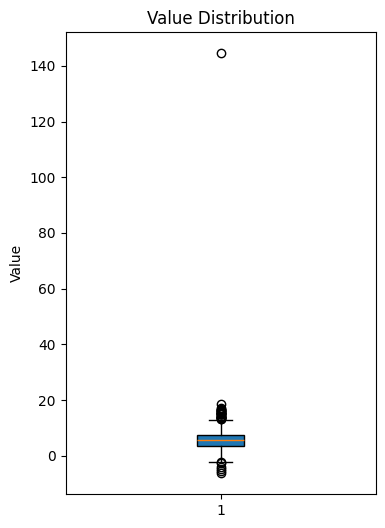

In [ ]:
plt.figure(figsize=(4,6))
values_pm25 = dfposts_PM25['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm25, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

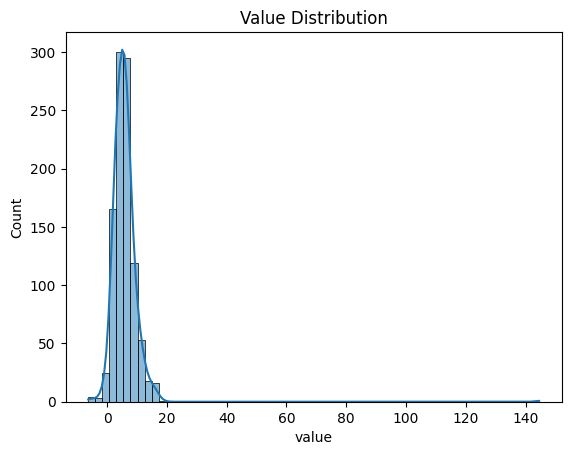

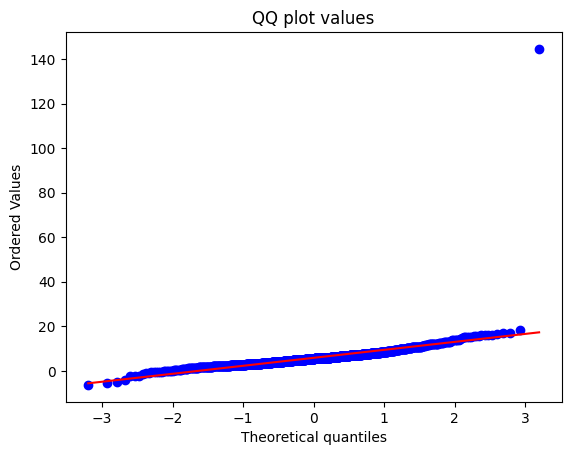

In [ ]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm25, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values_pm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [ ]:
dfposts_PM25['value'].skew()

np.float64(16.811443204800867)

In [ ]:
from scipy.stats import shapiro

p = shapiro(dfposts_PM25['value'])
print(p)

ShapiroResult(statistic=np.float64(0.44019186776443286), pvalue=np.float64(4.010133890361873e-48))


In [ ]:
c_pm25 = abs(values_pm25.min())
print(c_pm25)

6.3


In [ ]:
print(values_pm25)

0       9.70
1       7.21
2       8.64
3       5.30
4       6.10
       ...  
995     4.34
996    -6.30
997    11.00
998    12.70
999     8.93
Name: value, Length: 1000, dtype: float64


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm25 = values_pm25 + c_pm25 + 0.001
log_xpm25 = np.log(shiftpm25)  
print(log_xpm25)

0      2.772651
1      2.603504
2      2.704109
3      2.451091
4      2.517777
         ...   
995    2.364714
996   -6.907755
997    2.850764
998    2.944492
999    2.723333
Name: value, Length: 1000, dtype: float64


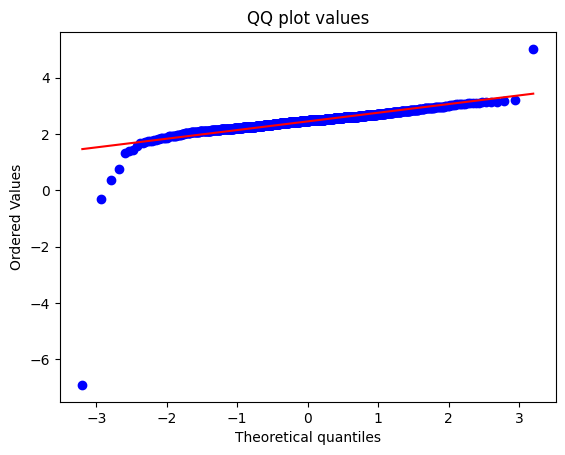

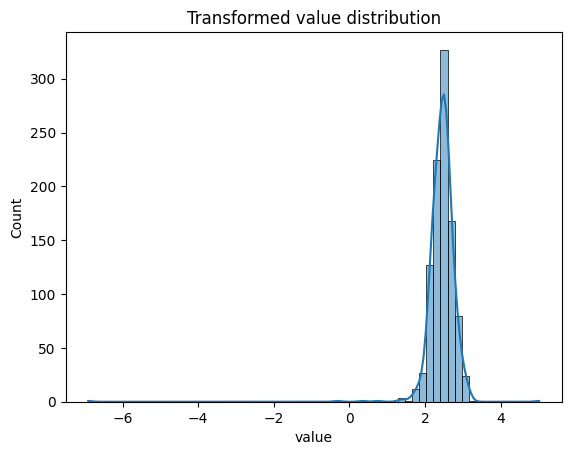

In [ ]:
stats.probplot(log_xpm25, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_xpm25,kde=True)
plt.title("Transformed value distribution")
plt.show()


In [ ]:
log_xpm25.skew()

np.float64(-11.407304509743971)

The skewness transforms negatively, therefore we need to implement another transformation practice in order to detect and handle outliers.

In [ ]:
bar_pm25 = px.bar(meanlocation_PM25, x='station_number' , y= 'value', title='Average µg/m³ PM2.5 per station')
bar_pm25.update_layout(yaxis_title='PM 2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm25.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm25.show()

Manually removing the NO2 only part and checking if len of the tuple is the same as the len of the intersection variable. If that's the case, the PM25 will be added to the tuple. We used the following link in order to manually link each station_numbers to its province: https://www.rivm.nl/lucht/meten-modelleren-berekenen/overschrijdingen. 


https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm25%7Cwind&bounds=6.90754%7C52.2298%7C6.9314%7C52.24208

In [ ]:
PM25_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL01912': 'Zeeland',
                  'NL10742': 'Groningen',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL10136': 'Limburg',
                  'NL01913': 'Zeeland',
                  'NL01487': 'Zuid-Holland',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10247':'Noord-Brabant', 
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10643': 'Zuid-Holland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL10938': 'Zuid-Holland',
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL49704':'Noord-Holland',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg',
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland',
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland',
                  'NL49556': 'Noord-Holland',
                  'NL49557': 'Noord-Holland',
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland',
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen',
                  'NL50007': 'Limburg',
                  'NL50011': 'Limburg',
                  'NL50012': 'Limburg',
                  'NL54010': 'Gelderland' }



63

In [ ]:
dfposts_PM25['RegioS']  = dfposts_PM25['station_number'].map(PM25_pvencoding)
meanprovince_pm25 = dfposts_PM25.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm25)


           RegioS     value
0       Flevoland  3.156250
1       Friesland  3.738235
2      Gelderland  5.129153
3       Groningen  5.542600
4         Limburg  6.974800
5   Noord-Brabant  5.759403
6   Noord-Holland  5.608280
7      Overijssel  2.558125
8         Utrecht  6.261429
9         Zeeland  4.954000
10   Zuid-Holland  6.568481


In [ ]:
print(meanprovince_pm25)
print('Mean NO2 value:', meanprovince_pm25['value'].mean())

           RegioS     value
0       Flevoland  3.156250
1       Friesland  3.738235
2      Gelderland  5.129153
3       Groningen  5.542600
4         Limburg  6.974800
5   Noord-Brabant  5.759403
6   Noord-Holland  5.608280
7      Overijssel  2.558125
8         Utrecht  6.261429
9         Zeeland  4.954000
10   Zuid-Holland  6.568481
Mean NO2 value: 5.113705060039003


In [ ]:
dfposts_PM25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm25 = meanprovince_pm25[meanprovince_pm25['RegioS'].isin(pv)]
bar = px.bar(meanprovince_pm25, x='RegioS' , y= dfposts_PM25.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM2.5 per Region')
bar.update_layout(yaxis_title='PM2.5 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar.show()

We know want to put it in a dataframe 

In [ ]:
dfposts_PM25 = pd.DataFrame(posts_luchtmeetnet_PM25["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
dfposts_PM25.head(10)

,formula,station_number,timestamp_measured,value
0,PM25,NL10248,2025-10-08T19:00:00+00:00,12.17
1,PM25,NL01488,2025-10-08T19:00:00+00:00,5.60
2,PM25,NL49701,2025-10-08T19:00:00+00:00,2.60
3,PM25,NL01912,2025-10-08T19:00:00+00:00,4.00
4,PM25,NL10418,2025-10-08T19:00:00+00:00,5.66
5,PM25,NL49556,2025-10-08T19:00:00+00:00,1.10
6,PM25,NL10934,2025-10-08T19:00:00+00:00,-0.24
7,PM25,NL49704,2025-10-08T19:00:00+00:00,1.60
8,PM25,NL01493,2025-10-08T19:00:00+00:00,5.40
9,PM25,NL49551,2025-10-08T19:00:00+00:00,1.00


In [285]:

dfcorrelation_pm25 = pd.merge(meanprovince_pm25, dfprovince, on='RegioS')

correlation_pm25 = dfcorrelation_pm25[['value', 'Sum']].corr()
corr_matrix_pm25 = go.Figure(data=go.Heatmap(
        z=correlation_pm25.values,
        x=correlation_pm25.columns,
        y=correlation_pm25.index,
        text=correlation_pm25.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm25.show()

# API Luchtmeetnet PM10

In [ ]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM10" # get data from luchtmeetnet api and filter it so that only PM10 formulas will be retrieved
posts_luchtmeetnet_PM10 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM10)

In [ ]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
dfposts_PM10.head(10)

,formula,station_number,timestamp_measured,value
0,PM10,NL49561,2025-10-09T19:00:00+00:00,13.30
1,PM10,NL50003,2025-10-09T19:00:00+00:00,22.00
2,PM10,NL49020,2025-10-09T19:00:00+00:00,14.10
3,PM10,NL10442,2025-10-09T19:00:00+00:00,17.23
4,PM10,NL01494,2025-10-09T19:00:00+00:00,12.30
5,PM10,NL54010,2025-10-09T19:00:00+00:00,14.20
6,PM10,NL10450,2025-10-09T19:00:00+00:00,22.35
7,PM10,NL49680,2025-10-09T19:00:00+00:00,12.90
8,PM10,NL10235,2025-10-09T19:00:00+00:00,10.83
9,PM10,NL10722,2025-10-09T19:00:00+00:00,19.79


In [251]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_PM10.head(10))



  formula station_number         timestamp_measured  value
0    PM10        NL49561  2025-10-09T19:00:00+00:00  13.30
1    PM10        NL50003  2025-10-09T19:00:00+00:00  22.00
2    PM10        NL49020  2025-10-09T19:00:00+00:00  14.10
3    PM10        NL10442  2025-10-09T19:00:00+00:00  17.23
4    PM10        NL01494  2025-10-09T19:00:00+00:00  12.30
5    PM10        NL54010  2025-10-09T19:00:00+00:00  14.20
6    PM10        NL10450  2025-10-09T19:00:00+00:00  22.35
7    PM10        NL49680  2025-10-09T19:00:00+00:00  12.90
8    PM10        NL10235  2025-10-09T19:00:00+00:00  10.83
9    PM10        NL10722  2025-10-09T19:00:00+00:00  19.79


In [252]:
dfposts_PM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [253]:
meanlocation_PM10 = dfposts_PM10.groupby('station_number')['value'].mean().reset_index()

print(meanlocation_PM10)

   station_number      value
0         NL01485  13.783333
1         NL01487  18.184615
2         NL01488  17.369231
3         NL01489  15.633333
4         NL01491  18.300000
..            ...        ...
77        NL50010  14.153846
78        NL50011  19.769231
79        NL50012  15.000000
80        NL54004  12.685000
81        NL54010  10.739231

[82 rows x 2 columns]


In [254]:
print(dfposts_PM10["station_number"].isna().sum())
print(dfposts_PM10["station_number"].nunique(), "station points")
print(dfposts_PM10["station_number"].unique())
print(dfposts_PM10["station_number"].value_counts())

0
82 station points
['NL49561' 'NL50003' 'NL49020' 'NL10442' 'NL01494' 'NL54010' 'NL10450'
 'NL49680' 'NL10235' 'NL10722' 'NL10131' 'NL49014' 'NL10237' 'NL10446'
 'NL49704' 'NL49573' 'NL10937' 'NL10241' 'NL01488' 'NL50011' 'NL49557'
 'NL49003' 'NL10550' 'NL49017' 'NL10133' 'NL49016' 'NL54004' 'NL10404'
 'NL10918' 'NL10240' 'NL10230' 'NL49570' 'NL10248' 'NL01493' 'NL10741'
 'NL49572' 'NL10437' 'NL50010' 'NL10236' 'NL01912' 'NL10807' 'NL10738'
 'NL10444' 'NL49980' 'NL10449' 'NL49553' 'NL10418' 'NL10641' 'NL01485'
 'NL10246' 'NL01913' 'NL10247' 'NL49007' 'NL10636' 'NL49703' 'NL49551'
 'NL49701' 'NL49556' 'NL10929' 'NL01491' 'NL49012' 'NL10445' 'NL10644'
 'NL10617' 'NL49546' 'NL01496' 'NL10934' 'NL01497' 'NL10818' 'NL50012'
 'NL01489' 'NL10138' 'NL10136' 'NL10318' 'NL01495' 'NL10639' 'NL49565'
 'NL49564' 'NL01487' 'NL10633' 'NL50007' 'NL10538']
station_number
NL01494    13
NL10442    13
NL10235    13
NL49704    13
NL54010    13
           ..
NL10318     9
NL01489     9
NL10617     9
NL0149

In [257]:
import numpy as np
uniqueNO2= dfposts_NO2['station_number'].unique()
print(uniqueNO2)

uniquePM10= dfposts_PM10['station_number'].unique()
print(uniquePM10)

intersection_pm10 = np.intersect1d(uniqueNO2, uniquePM10)

print(len(intersection_pm10))

differenceno2 = np.setdiff1d(uniqueNO2, uniquePM10)
differencepm10 = np.setdiff1d(uniquePM10, uniqueNO2)
print(differencepm25, 'PM10 only')
print(differenceno2, 'NO2 only')


['NL10404' 'NL49021' 'NL49565' 'NL10247' 'NL10641' 'NL49703' 'NL49014'
 'NL10644' 'NL49704' 'NL49020' 'NL10442' 'NL50003' 'NL49546' 'NL10450'
 'NL49551' 'NL49002' 'NL49019' 'NL01497' 'NL01912' 'NL10444' 'NL49012'
 'NL10643' 'NL10807' 'NL50010' 'NL10318' 'NL49680' 'NL49561' 'NL10617'
 'NL10929' 'NL10742' 'NL01493' 'NL10236' 'NL10230' 'NL49007' 'NL49022'
 'NL10938' 'NL10133' 'NL50002' 'NL10437' 'NL10741' 'NL49553' 'NL10934'
 'NL01491' 'NL54004' 'NL10240' 'NL10636' 'NL10107' 'NL01496' 'NL49003'
 'NL10131' 'NL49701' 'NL10445' 'NL49017' 'NL10248' 'NL10449' 'NL10301'
 'NL10538' 'NL10639' 'NL01488' 'NL01913' 'NL01489' 'NL10136' 'NL10138'
 'NL10235' 'NL10446' 'NL10738' 'NL49564' 'NL01485' 'NL01487' 'NL10550'
 'NL10633' 'NL10418' 'NL01494' 'NL10237' 'NL10918' 'NL10722' 'NL10241'
 'NL10937' 'NL10246' 'NL10818' 'NL01495']
['NL49561' 'NL50003' 'NL49020' 'NL10442' 'NL01494' 'NL54010' 'NL10450'
 'NL49680' 'NL10235' 'NL10722' 'NL10131' 'NL49014' 'NL10237' 'NL10446'
 'NL49704' 'NL49573' 'NL10937' 'NL1

https://hollandse-luchten.org/kaart/?layers=meetvragen%7Cpm10%7Cwind&bounds=4.98381%7C52.05999%7C5.26815%7C52.2067

In [266]:
PM10_pvencoding = {'NL49703': 'Noord-Holland',
                  'NL49553': 'Noord-Holland',
                  'NL01493': 'Zuid-Holland',
                  'NL10404': 'Zuid-Holland',
                  'NL10318': 'Zeeland',
                  'NL01912': 'Zeeland',
                  'NL10538': 'Noord-Holland',
                  'NL01496': 'Zuid-Holland',
                  'NL01495': 'Zuid-Holland', 
                  'NL49007': 'Noord-Holland',
                  'NL10636': 'Utrecht',
                  'NL49564': 'Noord-Holland',
                  'NL10818': 'Overijssel',
                  'NL10550': 'Noord-Holland',
                  'NL49546': 'Noord-Holland',
                  'NL10136': 'Limburg',
                  'NL10235': 'Noord-Brabant',
                  'NL01913': 'Zeeland',
                  'NL10918': 'Friesland',
                  'NL01487': 'Zuid-Holland',
                  'NL10639': 'Utrecht',
                  'NL01497': 'Zeeland',
                  'NL10644': 'Utrecht',
                  'NL10633': 'Utrecht',
                  'NL10741': 'Gelderland',
                  'NL10437': 'Zeeland',
                  'NL10247':'Noord-Brabant', 
                  'NL10445':'Zeeland',
                  'NL10934': 'Friesland',
                  'NL01494': 'Zuid-Holland',
                  'NL10449': 'Zuid-Holland',
                  'NL49017': 'Noord-Holland',
                  'NL49551': 'Noord-Holland',
                  'NL10617': 'Flevoland', 
                  'NL10442': 'Zuid-Holland',
                  'NL10446': 'Zuid-Holland',
                  'NL49565': 'Noord-Holland',
                  'NL10418':'Zuid-Holland',
                  'NL10138': 'Limburg',
                  'NL10450': 'Zuid-Holland',
                  'NL10929': 'Drenthe',
                  'NL49561': 'Noord-Holland', 
                  'NL01485': 'Zuid-Holland',
                  'NL49003': 'Noord-Holland',
                  'NL10246': 'Noord-Brabant', 
                  'NL10133': 'Limburg',
                  'NL49020': 'Noord-Holland', 
                  'NL10444': 'Zuid-Holland',  
                  'NL10738': 'Gelderland',
                  'NL49680': 'Flevoland', 
                  'NL10248': 'Noord-Brabant', 
                  'NL10240': 'Noord-Holland', 
                  'NL10230': 'Noord-Brabant',
                  'NL10131': 'Limburg', 
                  'NL49014': 'Noord-Holland',
                  'NL10641': 'Utrecht', 
                  'NL01491': 'Zuid-Holland',
                  'NL10236': 'Noord-Brabant',
                  'NL10241': 'Noord-Brabant',
                  'NL49701': 'Noord-Holland',
                  'NL49012': 'Noord-Holland', 
                  'NL10722': 'Gelderland',
                  'NL49704':'Noord-Holland',
                  'NL10807': 'Overijssel',
                  'NL01488': 'Zuid-Holland', 
                  'NL10937': 'Groningen',
                  'NL50010': 'Limburg', 
                  'NL50003': 'Limburg',
                  'NL54004':'Gelderland',
                  'NL01489': 'Zuid-Holland', 
                  'NL10821': 'Overijssel', 
                  'NL49016': 'Noord-Holland' ,
                  'NL49556': 'Noord-Holland', 
                  'NL49557': 'Noord-Holland', 
                  'NL49570': 'Noord-Holland',
                  'NL49572': 'Noord-Holland', 
                  'NL49573': 'Noord-Holland',
                  'NL49980': 'Groningen', 
                  'NL50007': 'Limburg', 
                  'NL50011': 'Limburg',  
                  'NL50012': 'Limburg', 
                  'NL54010': 'Gelderland'}

In [267]:
len(PM10_pvencoding)

82

In [274]:
bar_pm10 = px.bar(meanlocation_PM10, x='station_number' , y= 'value', title='Average µg/m³ PM10 per station')
bar_pm10.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

In [268]:
dfposts_PM10['RegioS']  = dfposts_PM10['station_number'].map(PM25_pvencoding)
meanprovince_pm10 = dfposts_PM10.groupby('RegioS')['value'].mean().reset_index()

print(meanprovince_pm10)


          RegioS      value
0      Flevoland  10.938462
1      Friesland  14.473077
2     Gelderland  14.330952
3      Groningen  14.821667
4        Limburg  15.061287
5  Noord-Brabant  12.807347
6  Noord-Holland  14.966118
7        Utrecht  13.908919
8        Zeeland  12.786842
9   Zuid-Holland  16.138333


In [273]:
import plotly.express as px
import plotly.graph_objects as go

pv = ['Groningen', 'Friesland', 'Drenthe', 'Overijssel', 'Gelderland', 'Flevoland',
      'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Noord-Brabant', 'Limburg', 'Zeeland' ]

pv_meanpm10 = meanprovince_pm10[meanprovince_pm10['RegioS'].isin(pv)]
bar_pm10 = px.bar(meanprovince_pm10, x='RegioS' , y= dfposts_PM10.groupby('RegioS')['value'].mean(), title='Average µg/m³ PM10 per Region')
bar_pm10.update_layout(yaxis_title='PM10 in µg/m³', xaxis_title= "Provinces", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar_pm10.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=15,
    y1=15,
    name='Threshold of 15 µg/m³'
)

bar_pm10.show()

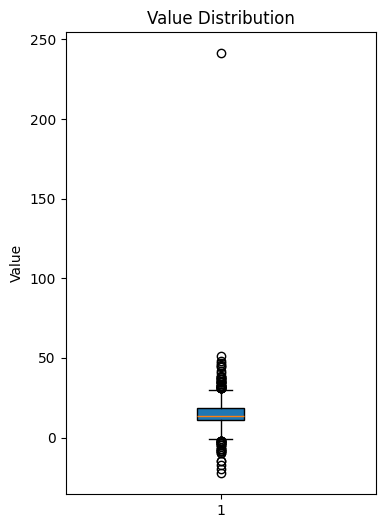

In [275]:
plt.figure(figsize=(4,6))
values_pm10 = dfposts_PM10['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values_pm10, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

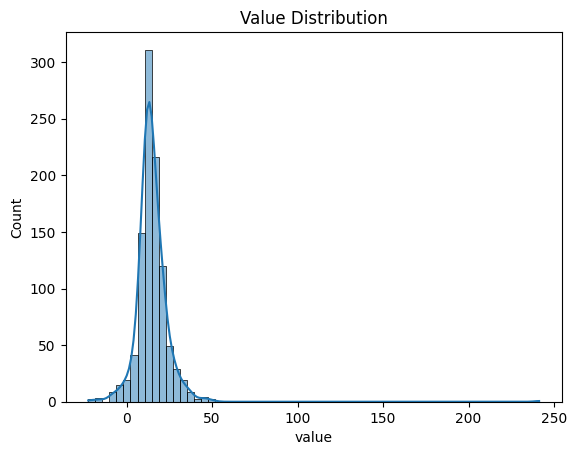

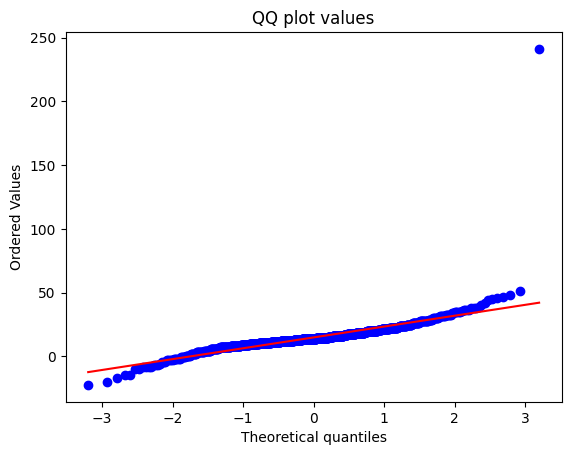

In [277]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values_pm10, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values_pm10, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [278]:
values.skew()

np.float64(1.6897480021212317)

In [279]:
c_pm10 = abs(values_pm10.min())

In [280]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shiftpm10 = values_pm10 + c_pm10 + 0.001
log_xpm10 = np.log(shiftpm10)  
print(log_xpm10)

0      3.576578
1      3.794387
2      3.598709
3      3.680872
4      3.548208
         ...   
995    3.680872
996    3.830401
997    3.539538
998    4.061322
999    3.557375
Name: value, Length: 1000, dtype: float64


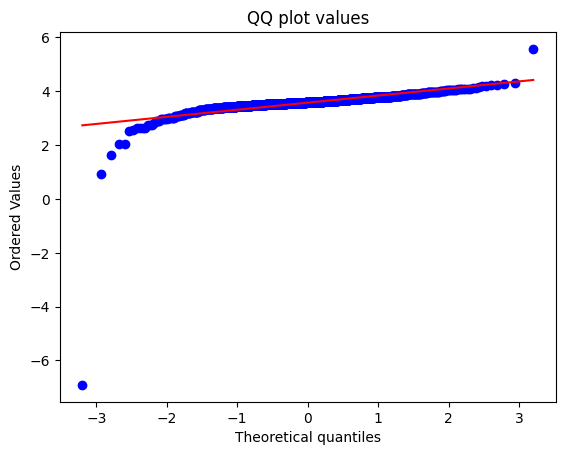

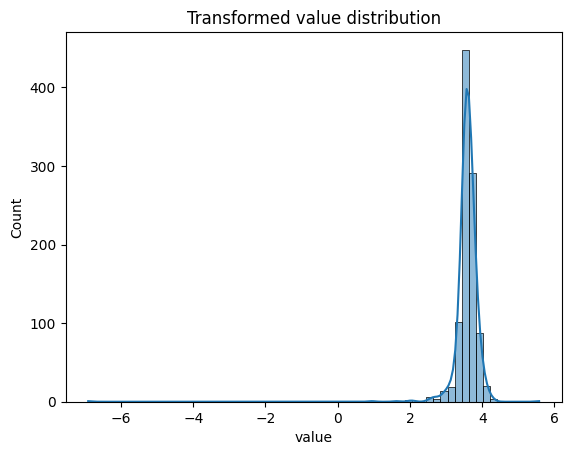

In [281]:
stats.probplot(log_xpm10, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_xpm10,kde=True)
plt.title("Transformed value distribution")
plt.show()


In [282]:
log_xpm10.skew()

np.float64(-16.056203282458874)

In [283]:

dfcorrelation_pm10 = pd.merge(meanprovince_pm10, dfprovince, on='RegioS')

correlation_pm10 = dfcorrelation_pm10[['value', 'Sum']].corr()
corr_matrix_pm10 = go.Figure(data=go.Heatmap(
        z=correlation_pm10.values,
        x=correlation_pm10.columns,
        y=correlation_pm10.index,
        text=correlation_pm10.values, #Show the values in the heatmap
        texttemplate="%{text:.2f}",
        colorscale='Viridis')) #Create the heatmap figure

corr_matrix_pm10.show()

###### https://stackoverflow.com/questions/70563254/map-of-a-country-with-plotly

# To DO:
* Check the negative values. Probably measurement errors, ignore them during the calculation --> Check its impact on distribution
* Aggregate the correlation matrices
* Provide comprhensive explanation about the code and provide good reasoning
* All the visualization needs to use the preprocessed data instead of the raw data
* Check if encoded data is exactly the same as the RegioS (linked to station_number)
* Make visualization for the following:
  * Barchart for sum location number for each province
  * Check threshold values hourly for PM10, PM2.5 and NO2
